# Ex1: Exploratory data analysis.
Using ex1_data_exploration.ipynb as a reference perform data analysis and preparation for the provided air quality dataset (PRSA_Data)
The source of the data is https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#

## Data Set Information:
This hourly data set considers 6 main air pollutants and 6 relevant meteorological variables at various locations in Beijing.

This data set includes hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites. The air-quality data are from the Beijing Municipal Environmental Monitoring Center. The meteorological data in each air-quality site are matched with the nearest weather station from the China Meteorological Administration. The time period is from March 1st, 2013 to February 28th, 2017. Missing data are denoted as NA.


Attribute Information:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: Particulate Matter 2.5 concentration (ug/m^3)
* PM10: Particulate Matter 10 concentration (ug/m^3)
* SO2: Sulfure Dioxide concentration (ug/m^3)
* NO2: Nitrogen Oxides concentration (ug/m^3)
* CO: Carbon Monoxide concentration (ug/m^3)
* O3: Ozone concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site



In [115]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import glob 

# matplotlib plots style
COLOR = 'yellow'
mpl.rcParams['text.color'] = mpl.rcParams['axes.labelcolor'] = mpl.rcParams['xtick.color'] = mpl.rcParams['ytick.color'] = COLOR

## Tasks
All following tasks should be coded in the jupyter notebook. Completed notebooks are to be send to maryna.kvasnytsia@vub.be
The notebooks are expected to contain code cells but also text cells, explaining your conclusions and insights into data. [deadline:17/03/22]

---

Task1: First concatenate the dataframes from different locations and perform all the following tasks on this merged dataset.
Tip: you can use pandas functions for merge: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
                

In [84]:
def load_dataframe():
    paths = glob.glob("data/*.csv")
    frames=[pd.read_csv(path) for path in paths]
    return pd.concat(frames)
df_raw = load_dataframe()
df = df.copy()
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,5.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


---

Task2: Specify if data is comlete or incomplete. Specify which attributes are missing.

In [4]:
#Quick description of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


- Row 5 till 15 are not fully filled, they must all represent numerical sensor-data.
- Row 16:'wd' is not fully filled and must represent the wind direction in a plain-text format.

---

Task3: Find incomplete rows. Fill in missing data

In [5]:
df.loc[df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
98,99,2013,3,5,2,107.0,138.0,NaN,56.0,1399.0,87.0,2.3,1013.5,-7.9,0.0,W,0.9,Wanshouxigong
99,100,2013,3,5,3,114.0,130.0,4.0,59.0,NaN,87.0,-0.4,1013.0,-7.7,0.0,WSW,1.1,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34912,34913,2017,2,22,16,131.0,131.0,NaN,95.0,NaN,47.0,6.0,1017.0,-4.2,0.0,WNW,1.2,Aotizhongxin
34913,34914,2017,2,22,17,28.0,28.0,11.0,17.0,500.0,NaN,6.8,1017.6,-9.2,0.0,NNW,2.6,Aotizhongxin
35027,35028,2017,2,27,11,122.0,122.0,NaN,NaN,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


There are 38600 rows incomplete, this represent 9.2% of the total data-set

In [6]:
def fill_missing(df):
    # filling missing numerical-values in a distributed time series
    df = df.interpolate() 
    # filling missing Wind Direction with a simple backfill
    df['wd'].fillna(method='bfill', inplace=True)
    return df
df = fill_missing(df)

---

Task4: Explore relationships between attributes and derive conclusions, supported by graphs.

In [81]:
#exploring correlation between the attributes
interesting_attributes =  ['month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
corr_matrix = df.corr()[interesting_attributes]
corr_matrix

,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
No,4.318051e-02,-0.024719,-0.047232,-0.227029,-0.047072,0.019026,-0.040679,-0.122671,0.188618,-0.102117,0.054354
year,-2.020099e-01,-0.026070,-0.039717,-0.170455,-0.055477,0.007489,-0.013782,-0.152312,0.187214,-0.165189,0.087666
month,1.000000e+00,0.006540,-0.029467,-0.214820,0.036351,0.046000,-0.105752,0.132502,-0.013835,0.266779,-0.139920
day,1.052232e-02,0.005445,0.027416,-0.001980,0.012401,-0.015630,-0.000510,0.014219,0.021971,0.022988,-0.011426
hour,-1.905981e-16,0.011129,0.049566,0.028943,-0.001776,-0.031367,0.277433,0.142173,-0.038464,-0.011966,0.140396
PM2.5,6.539506e-03,1.000000,0.878874,0.478223,0.664311,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.271425
PM10,-2.946699e-02,0.878874,1.000000,0.460572,0.645590,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.178200
SO2,-2.148197e-01,0.478223,0.460572,1.000000,0.495828,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.108536
NO2,3.635118e-02,0.664311,0.645590,0.495828,1.000000,0.694036,-0.465914,-0.277266,0.176639,-0.032553,-0.395706
CO,4.599987e-02,0.780165,0.691887,0.522678,0.694036,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.290413


Relevant Correlations:
* month         => all
* temp          => dewp (0.82), 03 (0.59), PRES (-0.81)
* PM2.5         => NO2 (0.66), CO (0.78)
* SO2           => PM2.5 (0.47), PM10 (0.46), NO2 (0.50), CO (0.52) 

### Temperature Correlations

In [43]:
# relevant temperature correlations
corr_matrix.TEMP.sort_values(ascending=False, key=abs).head(4)

TEMP    1.000000
DEWP    0.820247
PRES   -0.813312
O3      0.592248
Name: TEMP, dtype: float64

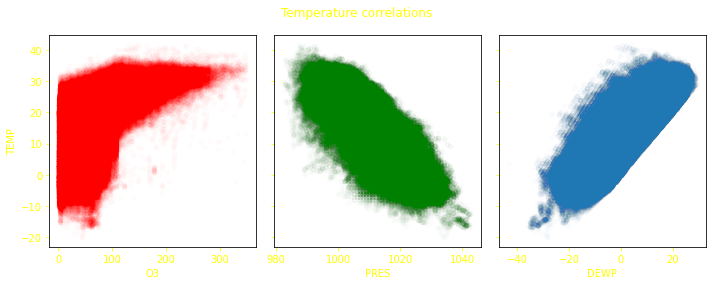

In [19]:
fig, ax = plt.subplots(1,3, figsize=(10,4), sharey=True)
df[df['O3']<350].plot(kind="scatter", x="O3", y="TEMP", alpha=0.01, color='r', ax=ax[0])
df.plot(kind="scatter", x="PRES", y="TEMP", alpha=0.01, color='g', ax=ax[1])
df.plot(kind="scatter", x="DEWP", y="TEMP", alpha=0.01, ax=ax[2])
plt.suptitle('Temperature correlations')
plt.tight_layout()

<AxesSubplot:xlabel='O3', ylabel='WSPM'>

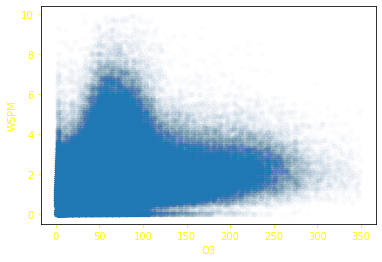

In [29]:
df[(df.O3<350) & (df.WSPM<10)].plot(kind="scatter", x="O3", y="WSPM", alpha=0.01)

* Temperature is of course strong correlated to the dewpoint.
Dewpoint is the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content. 

* Pressure is negative correlated to the temperature. (?)

* High temperatures accompanied with weak winds accelerates the production of Ozone in the air.  

### Pollutants Correlations

In [44]:
# relevant PM10 correlations
corr_matrix.PM10.sort_values(ascending=False, key=abs).head(4)

PM10     1.000000
PM2.5    0.878874
CO       0.691887
NO2      0.645590
Name: PM10, dtype: float64

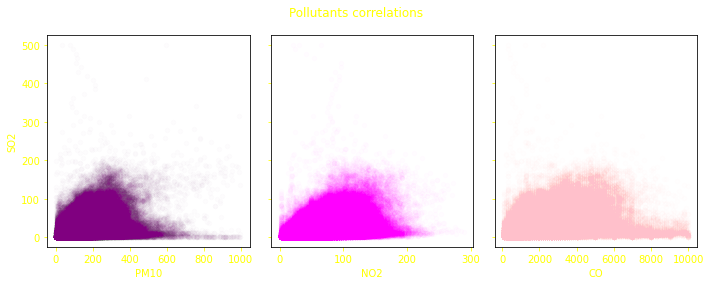

In [ ]:
fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(10,4), sharey=True)
df_SO2 = df
df_SO2.plot(kind="scatter", x="PM10", y="SO2", alpha=0.01, color='purple', ax=ax4)
df_SO2.plot(kind="scatter", x="NO2", y="SO2", alpha=0.01, color='magenta', ax=ax5)
df_SO2.plot(kind="scatter", x="CO", y="SO2", alpha=0.01, color='pink', ax=ax6)
plt.suptitle('Pollutants correlations')
plt.tight_layout()

These plots are not really relevant, but they demonstrate the need of proper bounds. 

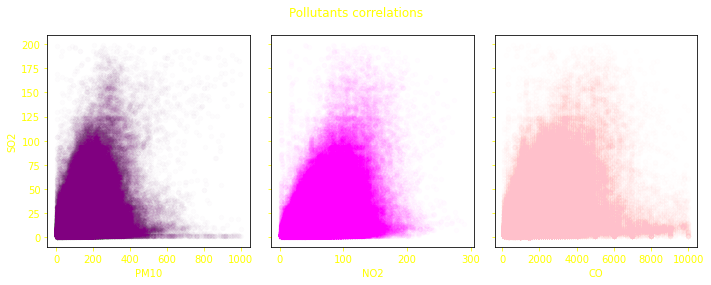

In [ ]:
fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(10,4), sharey=True)
df_SO2 = df[df['SO2']<200]
df_SO2.plot(kind="scatter", x="PM10", y="SO2", alpha=0.01, color='purple', ax=ax4)
df_SO2.plot(kind="scatter", x="NO2", y="SO2", alpha=0.01, color='magenta', ax=ax5)
df_SO2.plot(kind="scatter", x="CO", y="SO2", alpha=0.01, color='pink', ax=ax6)
plt.suptitle('Pollutants correlations')
plt.tight_layout()

In [49]:
# relevant WSPM & Pollutants correlations
corr_matrix.WSPM.sort_values(ascending=False, key=abs).head(7)

WSPM     1.000000
NO2     -0.395706
DEWP    -0.296771
O3       0.294351
CO      -0.290413
PM2.5   -0.271425
PM10    -0.178200
Name: WSPM, dtype: float64

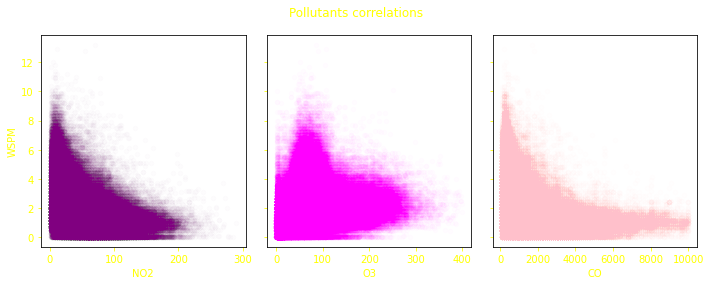

In [53]:
fig, (ax7,ax8,ax9) = plt.subplots(1,3, figsize=(10,4), sharey=True)
df.plot(kind="scatter", x="NO2", y="WSPM", alpha=0.01, color='purple', ax=ax7)
df[df.O3<400].plot(kind="scatter", x="O3", y="WSPM", alpha=0.01, color='magenta', ax=ax8)
df.plot(kind="scatter", x="CO", y="WSPM", alpha=0.01, color='pink', ax=ax9)
plt.suptitle('Pollutants correlations')
plt.tight_layout()

Higher wind speed results in lesser concentration of pollutants, this is clearly shown in the last plot above.

---

Task5: Does this data needs scaling? Why? If yes, perform the scaling

> Scaling the target value is a good idea in regression modelling. </br>
> Scaling of the data makes it easy for a model to learn and understand the problem. </br>
> Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.

Prepare dataframe

In [89]:
df_prepared = df_raw.copy()
# selecting the attributes
df_prepared = df_prepared[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']] 
# fill missing values (interpolation is here a great method) 
df_prepared.interpolate(inplace=True)
# removing outliers 
pass

Scale dataframe

In [113]:
df_scaled = df_prepared.copy()
scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)
df_scaled.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,-0.875103,-1.037638,-0.452723,-0.955328,-0.891455,0.083349,-1.156833,1.064193,-1.556961,0.216549
1,-0.850397,-1.016001,-0.407054,-1.040625,-0.891455,0.153358,-1.191805,1.111929,-1.578704,2.141674
2,-0.887457,-1.048457,-0.498392,-0.983760,-0.891455,0.030841,-1.235520,1.131023,-1.607695,2.382315
3,-0.887457,-1.048457,-0.589731,-0.983760,-0.848418,-0.170436,-1.244262,1.216948,-1.694666,0.697831
4,-0.887457,-1.048457,-0.589731,-1.097490,-0.805381,-0.371713,-1.261748,1.274231,-1.752647,0.617617


---

Task6: Split the data to training and testing set. Is random split sufficient or do we need to apply stratified split?

In [129]:
train_set, test_set = train_test_split(df_scaled, test_size=0.2, random_state=75)
test_set.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
22326,1.039656,0.639283,-0.544062,1.461434,0.055361,-0.966794,0.242030,0.281323,0.943463,-0.585586
1808,-0.183319,0.487819,1.922077,0.864352,0.140574,-0.774267,0.766604,-0.081470,0.167969,-1.066867
4125,-0.603331,-0.366870,-0.498392,-0.301381,-0.288936,0.643424,1.186264,-0.482452,1.030434,-1.387721
11143,-0.702157,-0.691435,-0.498392,0.295702,-0.547158,-0.879282,0.696661,-1.274868,0.849244,-0.425159
3657,-0.590978,-1.037638,-0.407054,-0.073921,-0.288936,-0.214192,1.282435,-1.398981,1.356576,-0.264732


In [167]:
# df_prepared[df_prepared['PM2.5'].between(2, 10, inclusive=True)] #.sort_values(ascending=True.head(10)
s_PM = df_prepared['PM2.5']
s_PM[(200 <= s_PM) & (s_PM <= 1000)]


117      202.0
118      216.0
119      214.0
120      220.0
121      229.0
         ...  
34756    284.0
34757    275.0
34758    270.0
34759    270.0
34760    236.0
Name: PM2.5, Length: 35520, dtype: float64

In [169]:
# dividing in stratums
df_prepared["PM2.5_C"] = pd.cut(df_prepared["PM2.5"],
                               bins=[2.0, 20, 40, 60, 80, 100, 150, np.inf],
                               labels=[1, 2, 3, 4, 5, 6, 7])


---

Left to do:
* remove outliers
* add more explanations